.# HOUSING: PRICE PREDICTION

### PROBLEM STATEMENT

    Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
    market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
    and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
    in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
    focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
    recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
    companies. Our problem is related to one such housing company.
    A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
    data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
    purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
    The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
    using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
    in them or not. For this company wants to know:
        • Which variables are important to predict the price of variable?
        • How do these variables describe the price of the house?

### DATA

In [1]:
#Importing Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import power_transform,StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows",1500) 

Setting the dataset to dispay maximum rows and columns

In [3]:
#loading dataset
train_data =pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [4]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [5]:
train_data.shape

(1168, 81)

There are 1168 rows and 81 columns in the training dataset

In [6]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [7]:
test_data.shape

(292, 80)

There are 292 rows and 80 columns in the testing dataset

In [8]:
train_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Some columns have more than 90% Null Values, So We will remove them and the columns which have less null values wi will fill them with suitable values/process

      

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [10]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [12]:
#Adding source columns to both train and test data with 'train' and 'test' values
train_data['source'] = 'train'
test_data['source'] = 'test'
df = pd.concat([train_data,test_data],ignore_index = True) #Combining both train and test data
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
5     1197          60       RL         58.0    14054   Pave   NaN      IR1   
6      561          20       RL          NaN    11341   Pave   NaN      IR1   
7     1041          20       RL         88.0    13125   Pave   NaN      Reg   
8      503          20       RL         70.0     9170   Pave   NaN      Reg   
9      576          50       RL         80.0     8480   Pave   NaN      Reg   
10     449          50       RM         50.0     8600   Pave   NaN      Reg   
11     833          60       RL         44.0     9548   Pave   NaN      IR1   
12     277          20       RL        129.0     9196   Pave   NaN      IR1   
13      84          20       RL         80.0     8892   Pave   NaN      IR1   
14     888          50       RL         59.0    16466   Pave   NaN      IR1   
15    1013          70       RL         55.0    10592   Pave   NaN      Reg   
16    1154          30       RM          NaN     5890   Pave   NaN      Reg   
17     728          20       RL         64.0     7314   Pave   NaN      Reg   
18     270          20       RL          NaN     7917   Pave   NaN      IR1   
19    1105         160       RM         24.0     2016   Pave   NaN      Reg   
20     259          60       RL         80.0    12435   Pave   NaN      Reg   
21    1407          85       RL         70.0     8445   Pave   NaN      Reg   
22    1459          20       RL         68.0     9717   Pave   NaN      Reg   
23     997          20       RL          NaN    10659   Pave   NaN      IR1   
24    1094          20       RL         71.0     9230   Pave   NaN      Reg   
25     114          20       RL          NaN    21000   Pave   NaN      Reg   
26    1384          30       RL          NaN    25339   Pave   NaN      Reg   
27     379          20       RL         88.0    11394   Pave   NaN      Reg   
28     556          45       RM         58.0     6380   Pave   NaN      Reg   
29     464          70       RL         74.0    11988   Pave   NaN      IR1   
30      46         120       RL         61.0     7658   Pave   NaN      Reg   
31     426          60       RM         60.0     3378   Pave  Grvl      Reg   
32    1231          90       RL          NaN    18890   Pave   NaN      IR1   
33     171          50       RM          NaN    12358   Pave   NaN      IR1   
34     869          60       RL          NaN    14762   Pave   NaN      IR2   
35     151          20       RL        120.0    10356   Pave   NaN      Reg   
36     859          20       RL         80.0    10400   Pave   NaN      Reg   
37     176          20       RL         84.0    12615   Pave   NaN      Reg   
38     361          85       RL          NaN     7540   Pave   NaN      IR1   
39     590          40       RM         50.0     9100   Pave   NaN      Reg   
40     172          20       RL        141.0    31770   Pave   NaN      IR1   
41     527          20       RL         70.0    13300   Pave   NaN      Reg   
42    1365         160       FV         30.0     3180   Pave  Pave      Reg   
43     146         160       RM         24.0     2522   Pave   NaN      Reg   
44    1006          80       RL         65.0     8385   Pave   NaN      Reg   
45     275          20       RL         76.0     8314   Pave   NaN      Reg   
46     380          60       RL         60.0     8123   Pave   NaN      IR1   
47    1309          20       RM        100.0    12000   Pave   NaN      Reg   
48     534          20       RL         50.0     5000   Pave   NaN      Reg   
49     494          20       RL         70.0     7931   Pa

Combining both test and train data

In [13]:
df.shape

(1460, 82)

After combining the both training and testing dataset there are total 1460 rows and 82 columns in the dataset

In [14]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

        The following columns have NaN values which can be imputed

    - 'Alley'
    - 'PoolQC'
    - 'MiscFeature'
    - 'Fence'
    - 'MasVnrType'
    - 'BsmtQual'
    - 'BsmtCond'
    - 'BsmtExposure'
    - 'BsmtFinType1'
    - 'BsmtFinType2'
    - 'FireplaceQu'
    - 'GarageType'
    - 'GarageFinish'
    - 'GarageQual'
    - 'GarageCond'

        The following attributes should be dropped because they hae 50% NaN values. 
    - 'Alley'
    - 'PoolQC'
    - 'MiscFeature'
    - 'Fence' 
    - 'FireplaceQu'

In [16]:
df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis= 1,inplace = True)

Droped the Unnecessary Columns

In [17]:
df.shape

(1460, 77)

After removing the columns we have 77 columns left in the dataset

### Statistical Summary

In [18]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

    - There are a total of 1460 entries


    - Outliers are there in the following attributes 

    'MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal' and 'SalePrice'


    - The following columns are Positively skewed 
     'MasVnrArea','BsmtFinSF1','WoodDeckSF', 'EnclosedPorch','MiscVal' and 'SalePrice'.

In [19]:
for i in df.columns:
    print(df[i].value_counts())

1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
499     1
480     1
478     1
501     1
477     1
458     1
459     1
460     1
461     1
462     1
463     1
464     1
465     1
466     1
467     1
468     1
469     1
470     1
471     1
472     1
473     1
474     1
475     1
476     1
500     1
502     1
547     1
525     1
527     1
528     1
529     1
530     1
531     1
532     1
533     1
534     1
535     1
536     1
537     1
538     1
539     1
540     1
541     1
542     1
543     1
544     1
545     1
526     1
524     1
503     1
523     1
504     1
505     1
506     1
507     1
508     1
509     1
510     1
511     1
512     1
513     1
514     1
515     1
516     1
517     1
518     1
519     1
520     1
521     1
522     1
457     1
456     1
455     1
388     1
390     1
391     1
392     1
393     1
394     1
395     1


In [20]:
median = df[['LotFrontage','GarageYrBlt','MasVnrArea']]

mode = df[['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','Electrical','MasVnrType']]

for i in median:
    medianvalue = df[i].median()
    df[i].fillna(medianvalue, inplace = True)

for i in mode:
    modevalue = df[i].mode()[0]
    df[i].fillna(modevalue, inplace = True)

Filling the Nan's with mode and median

In [21]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [22]:
#splitting the data into two lists according to numerical and categorical features
Numerical_df = []
Categorical_df = []

for i in df:
    if ((df[i].dtypes=='int64')|(df[i].dtypes=='float')):
        Numerical_df.append(i)
    else:
        Categorical_df.append(i)

## Data Visualization

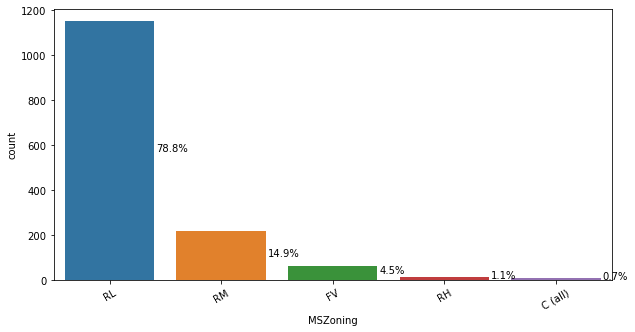

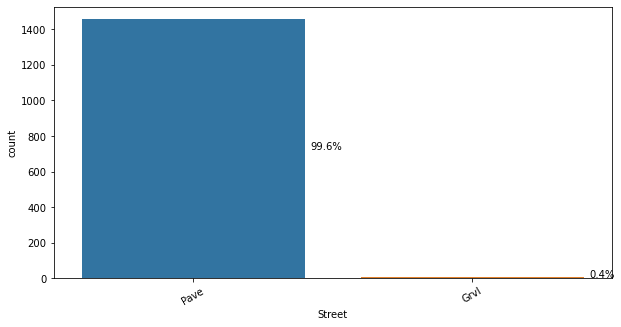

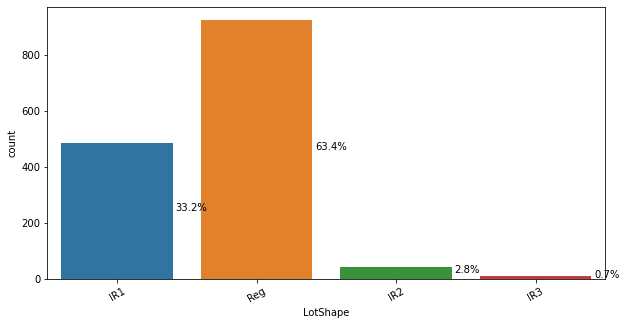

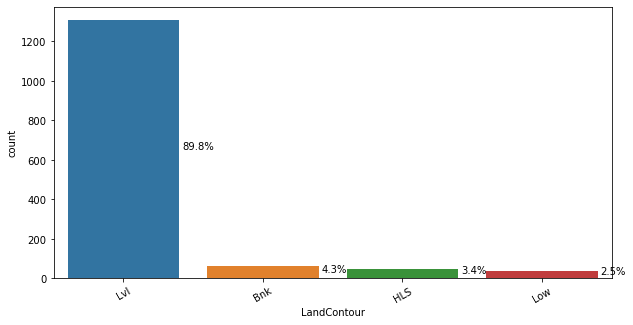

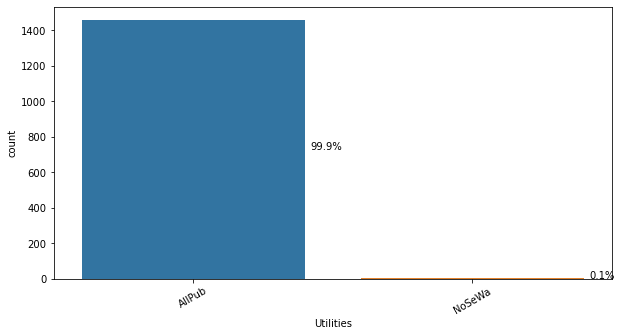

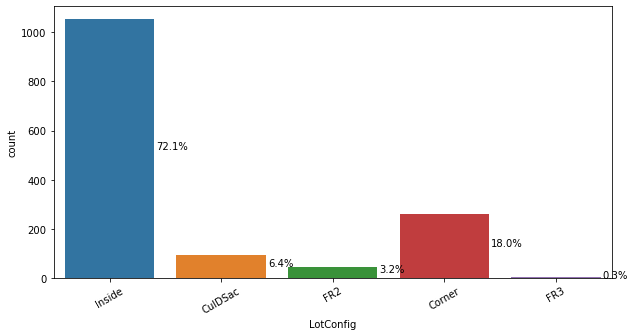

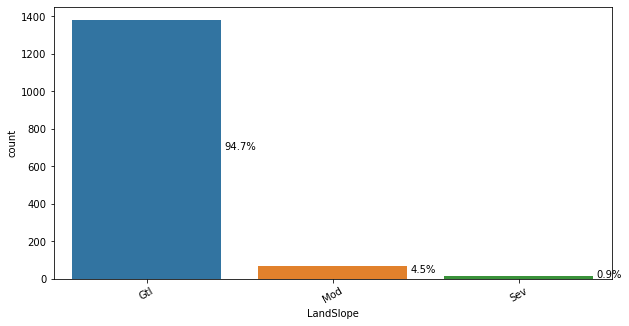

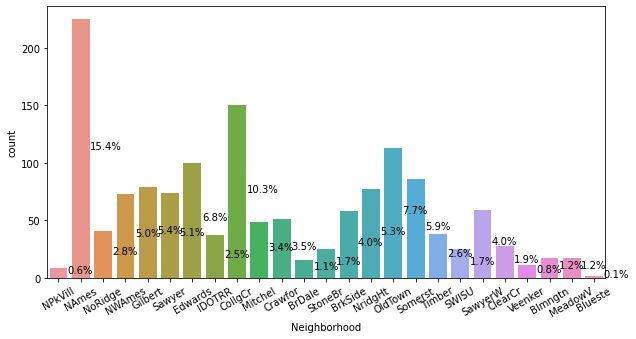

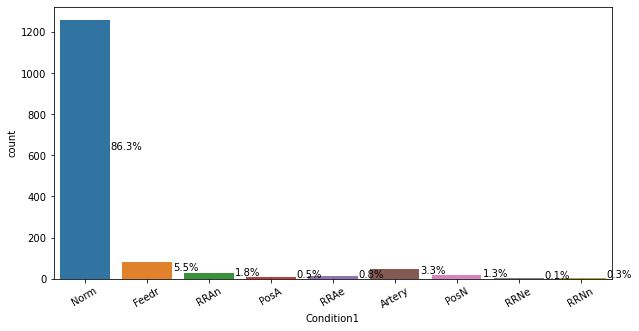

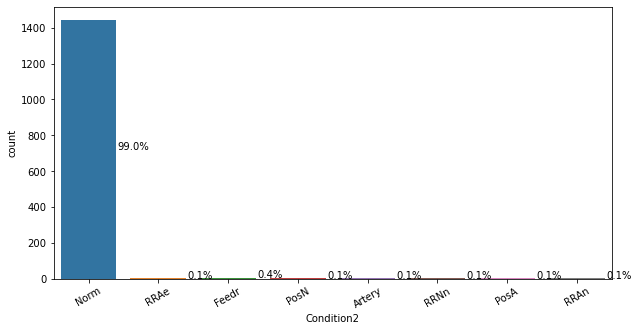

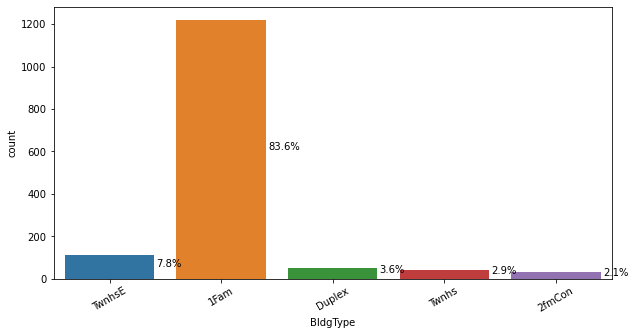

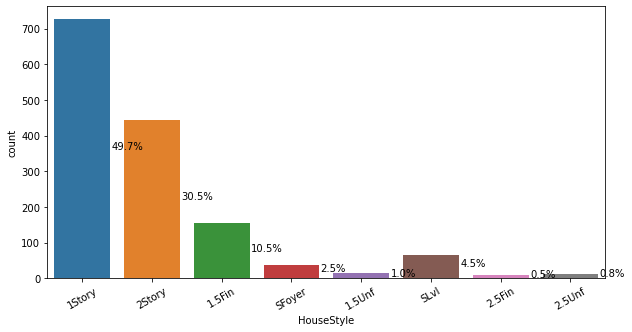

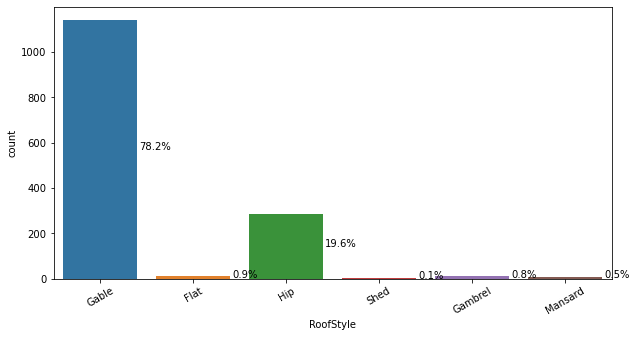

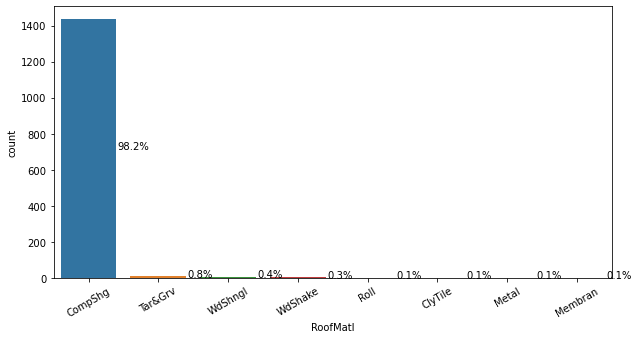

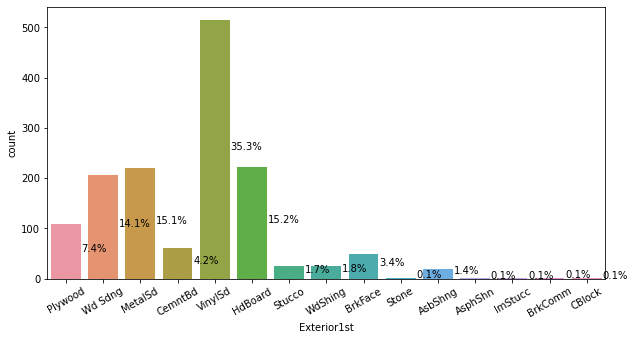

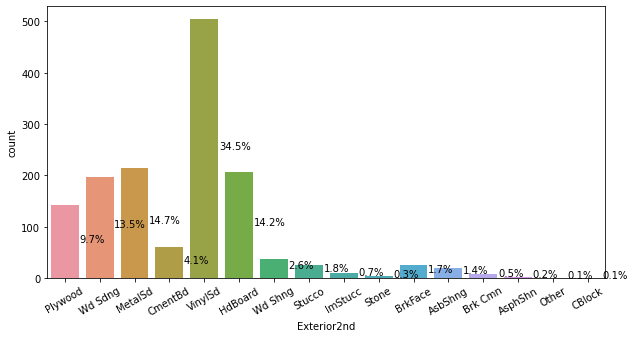

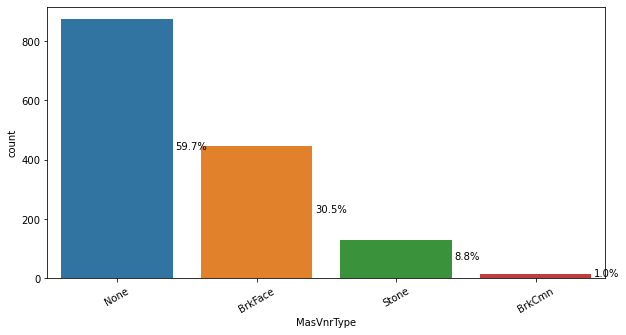

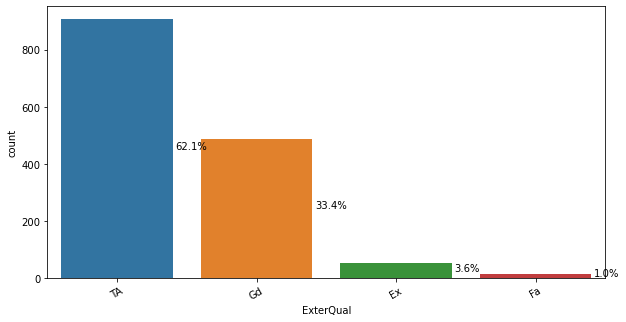

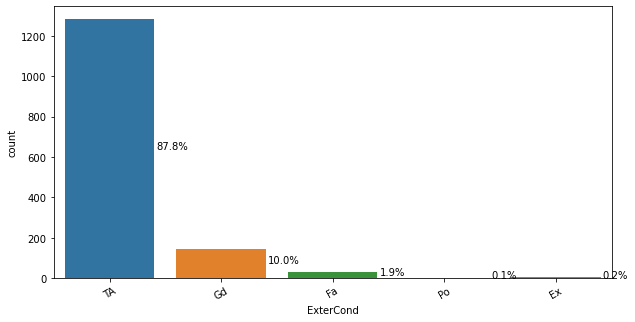

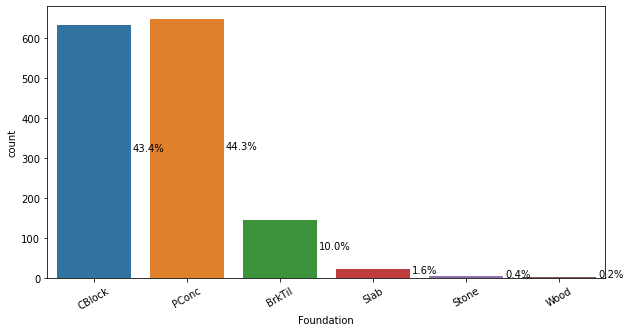

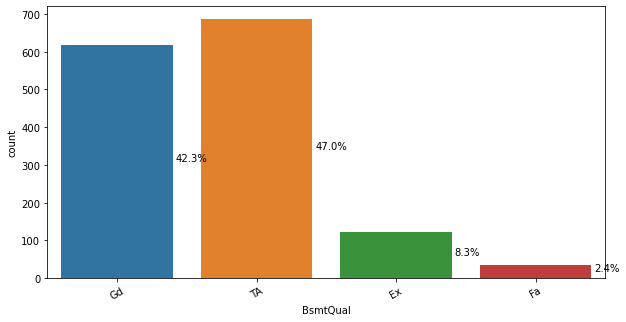

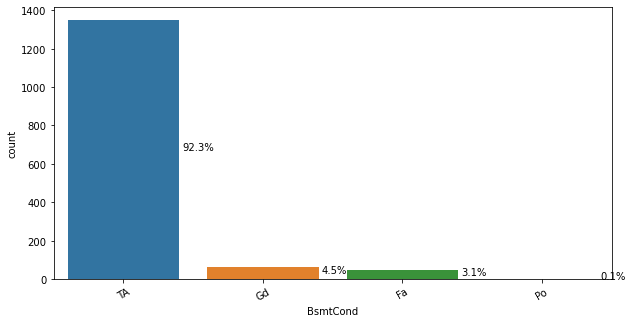

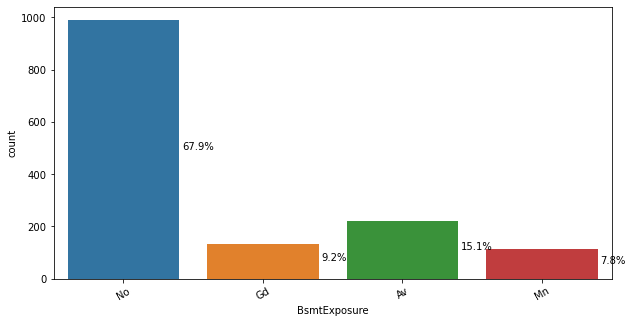

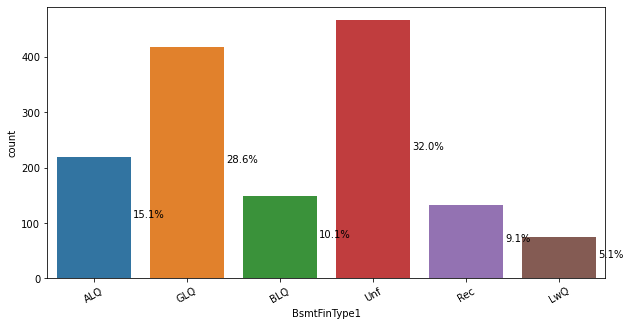

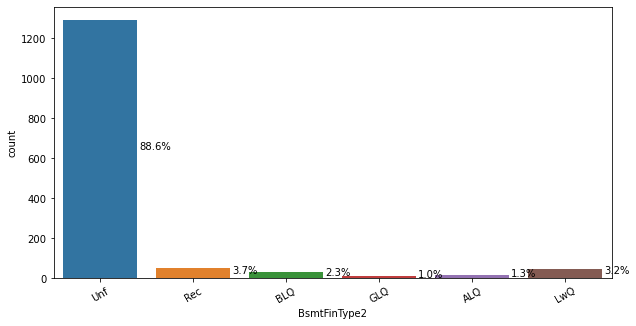

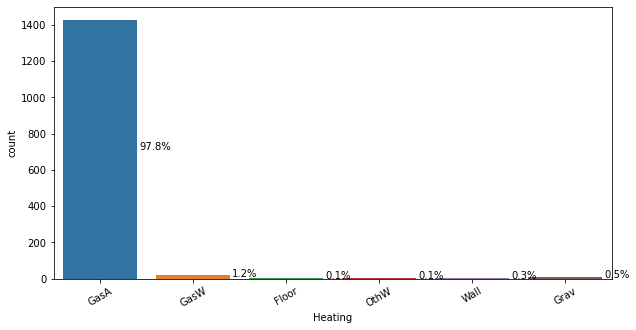

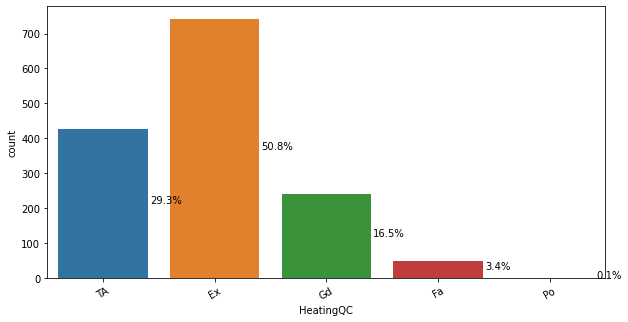

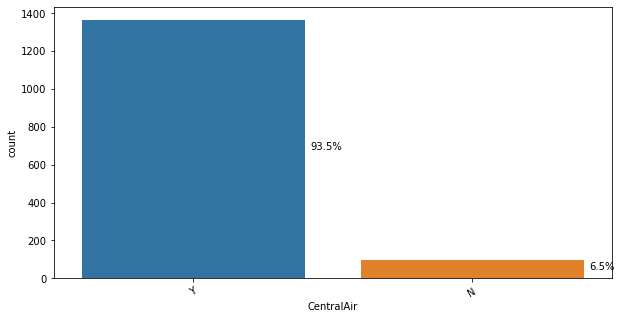

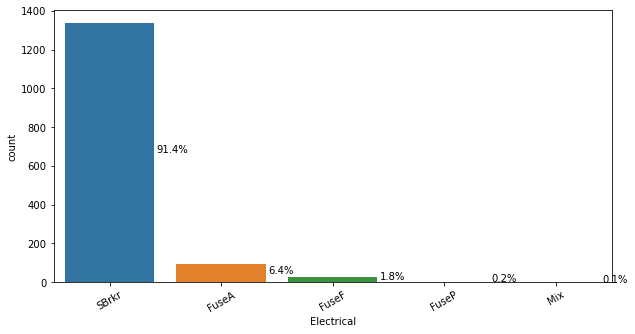

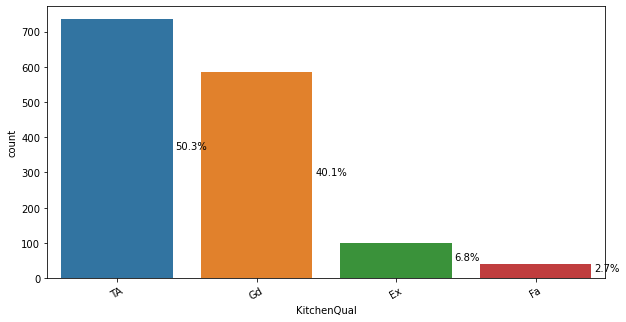

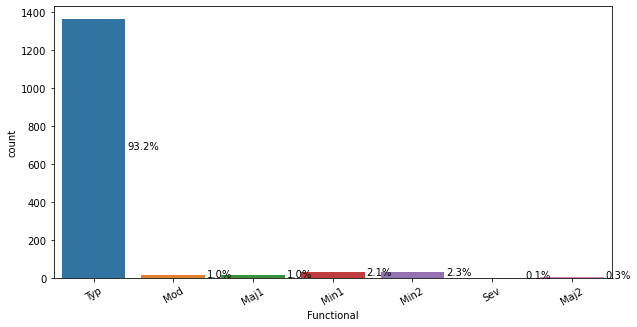

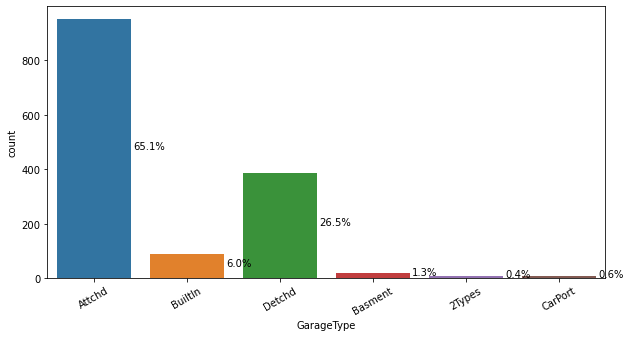

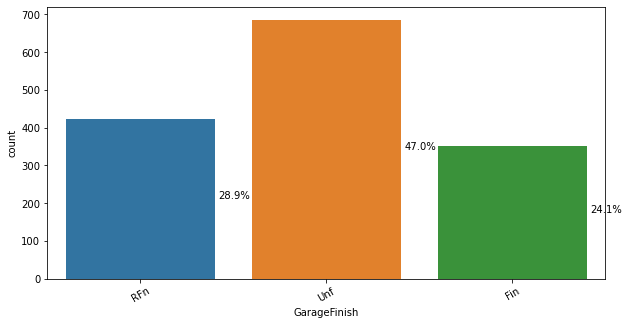

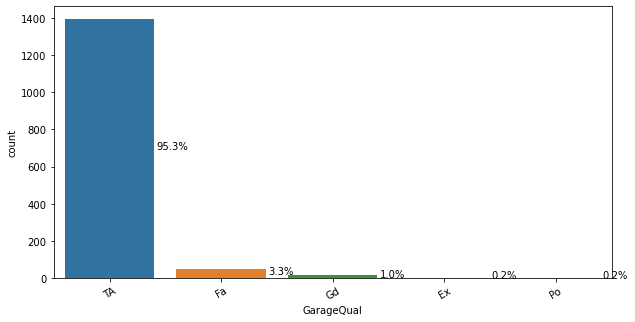

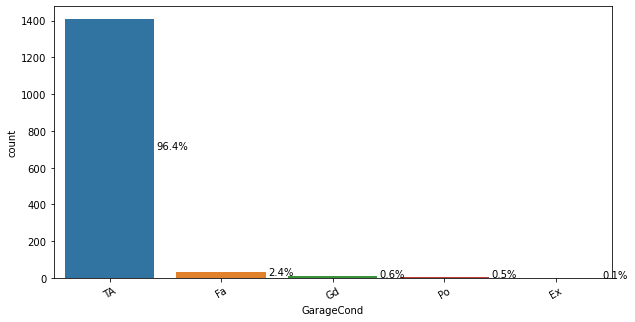

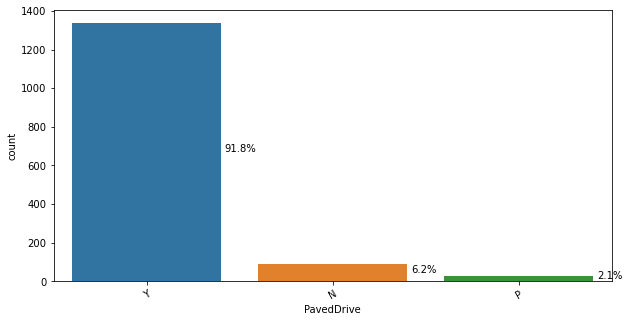

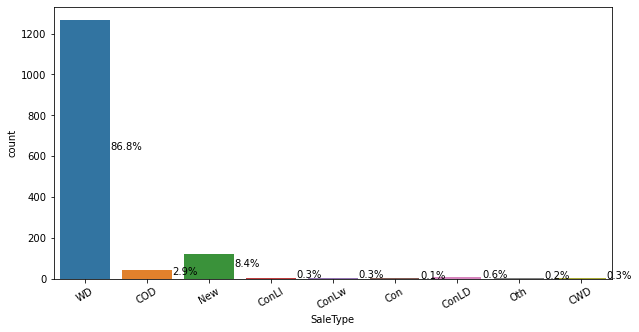

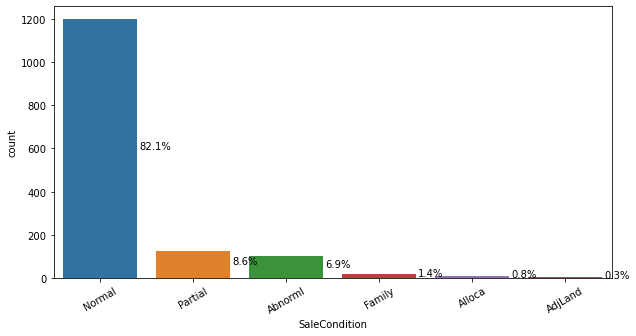

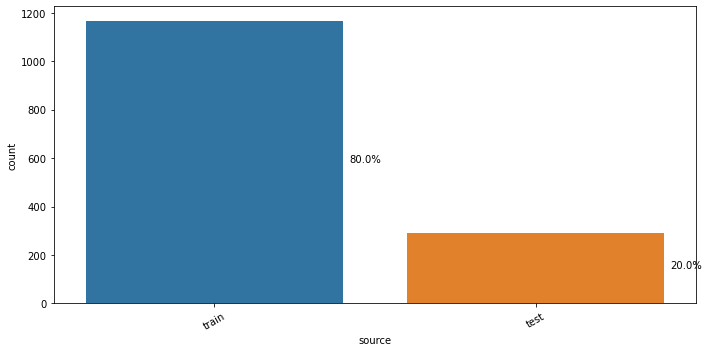

In [23]:
# Visualizing the count plot for each categorical variable column through seaborn. 
for i in Categorical_df:
    plt.figure(figsize = (10,5))
    ax = sns.countplot(df[i])
    plt.xticks(rotation = 30)
   
    
    
    total = len(df[i])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.tight_layout()

<Figure size 864x720 with 0 Axes>

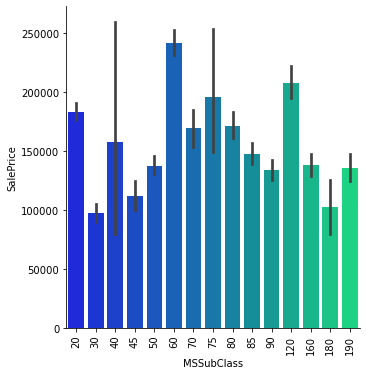

<Figure size 864x720 with 0 Axes>

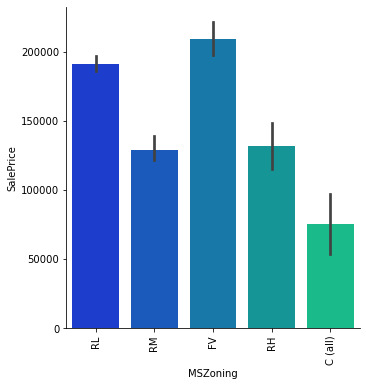

<Figure size 864x720 with 0 Axes>

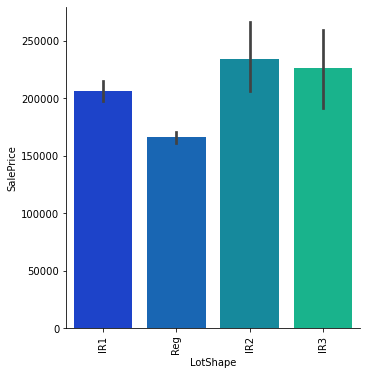

<Figure size 864x720 with 0 Axes>

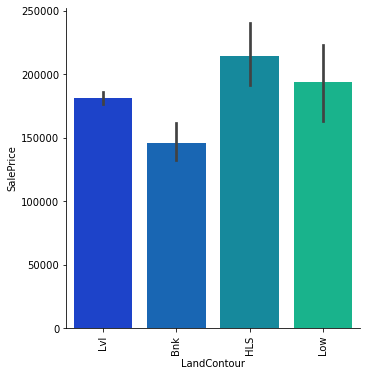

<Figure size 864x720 with 0 Axes>

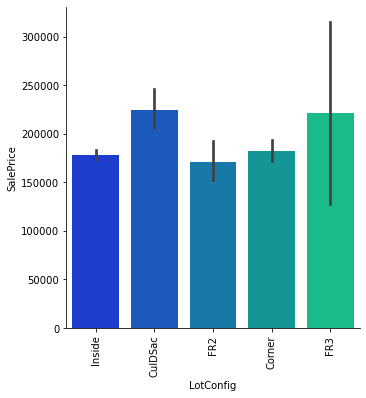

<Figure size 864x720 with 0 Axes>

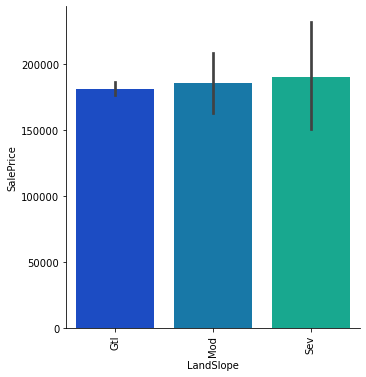

<Figure size 864x720 with 0 Axes>

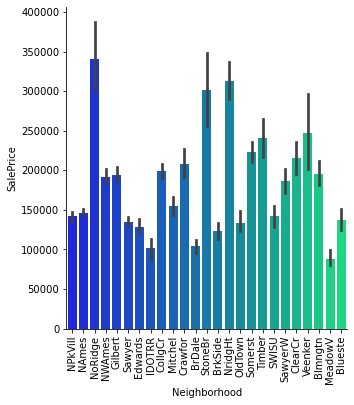

<Figure size 864x720 with 0 Axes>

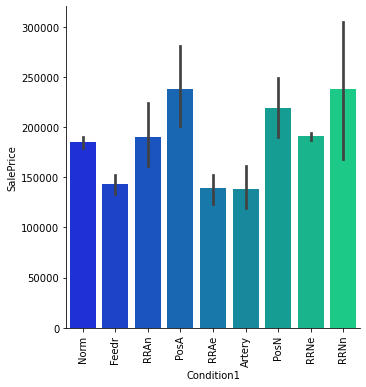

<Figure size 864x720 with 0 Axes>

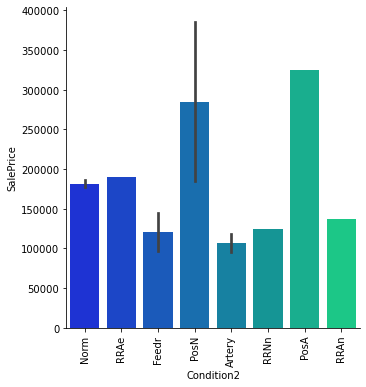

<Figure size 864x720 with 0 Axes>

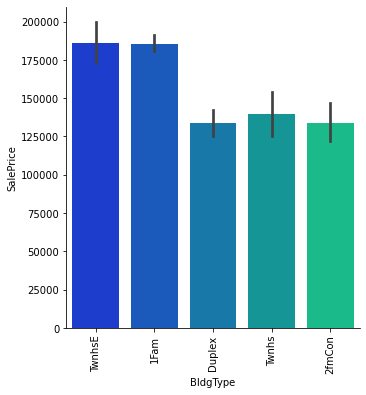

<Figure size 864x720 with 0 Axes>

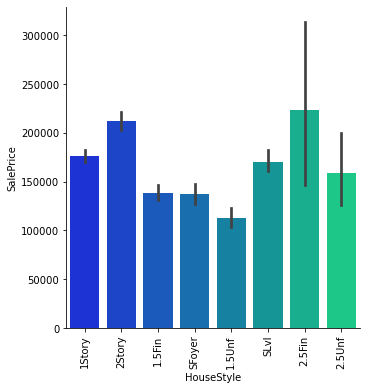

<Figure size 864x720 with 0 Axes>

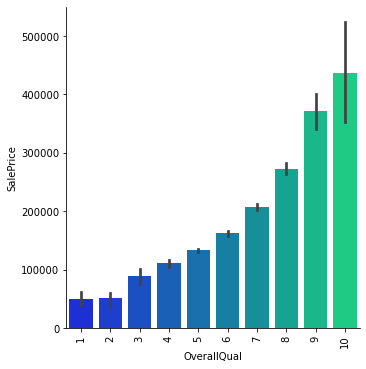

<Figure size 864x720 with 0 Axes>

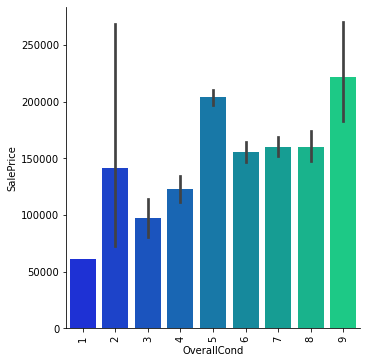

<Figure size 864x720 with 0 Axes>

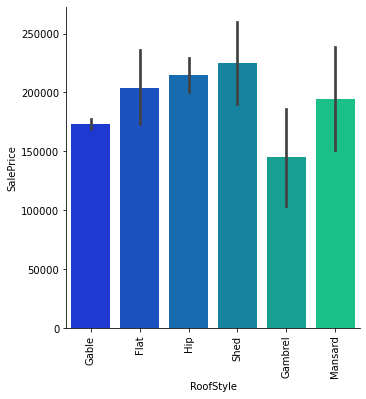

<Figure size 864x720 with 0 Axes>

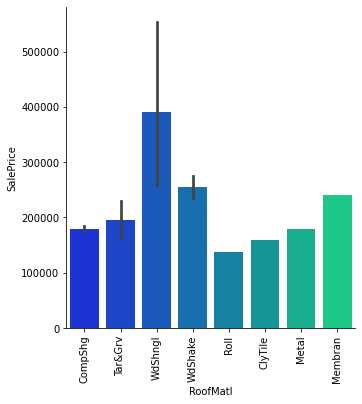

<Figure size 864x720 with 0 Axes>

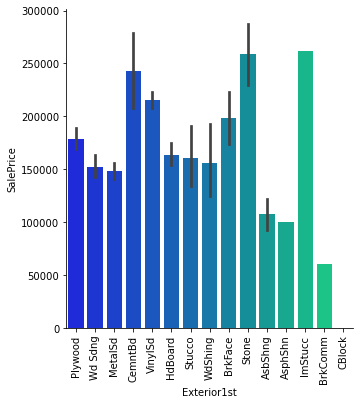

<Figure size 864x720 with 0 Axes>

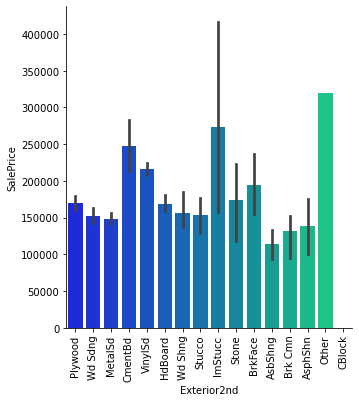

<Figure size 864x720 with 0 Axes>

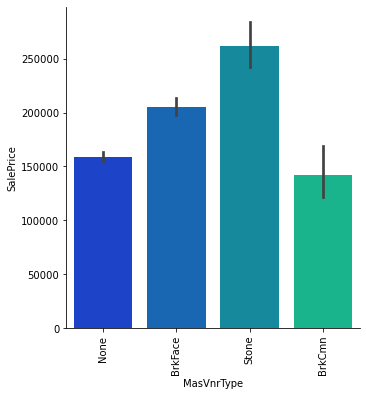

<Figure size 864x720 with 0 Axes>

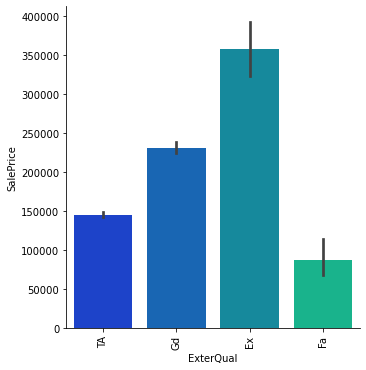

<Figure size 864x720 with 0 Axes>

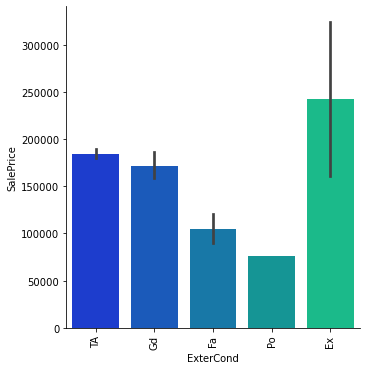

<Figure size 864x720 with 0 Axes>

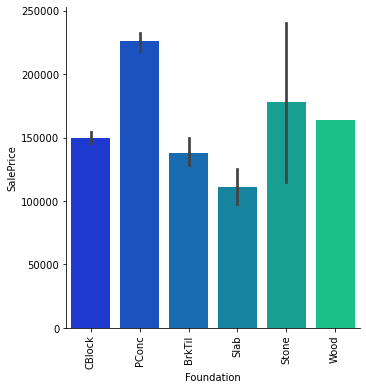

<Figure size 864x720 with 0 Axes>

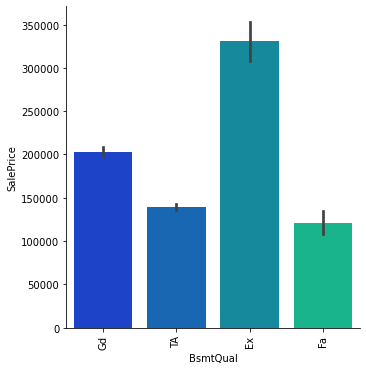

<Figure size 864x720 with 0 Axes>

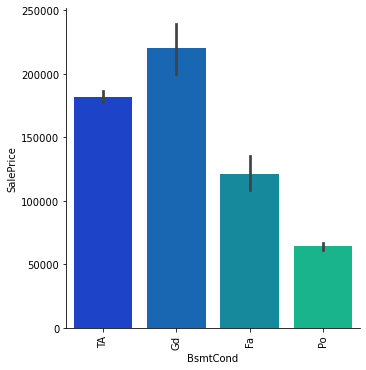

<Figure size 864x720 with 0 Axes>

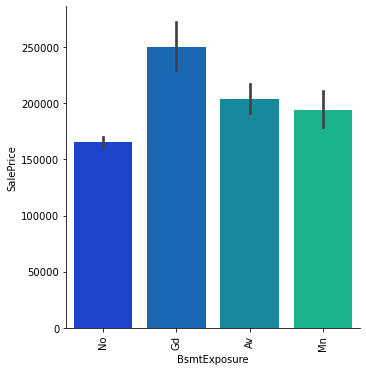

<Figure size 864x720 with 0 Axes>

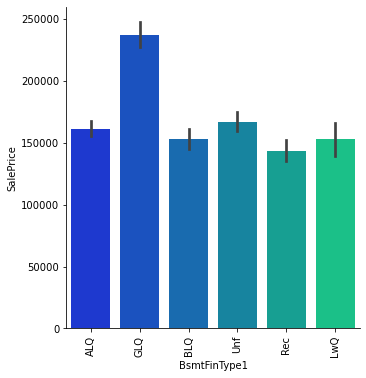

<Figure size 864x720 with 0 Axes>

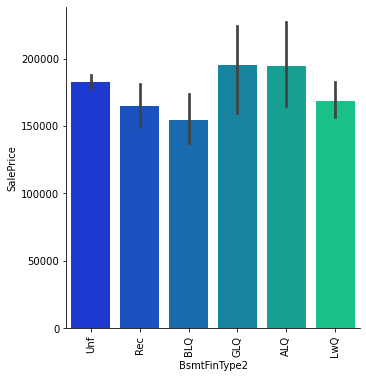

<Figure size 864x720 with 0 Axes>

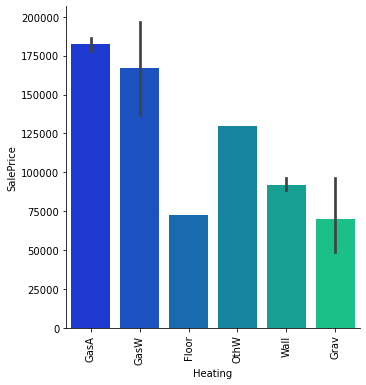

<Figure size 864x720 with 0 Axes>

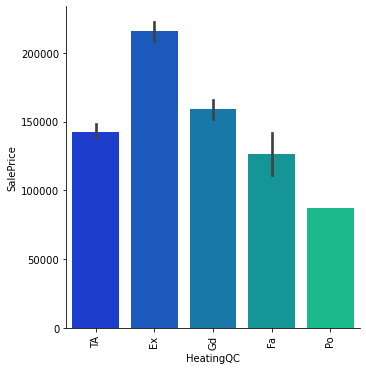

<Figure size 864x720 with 0 Axes>

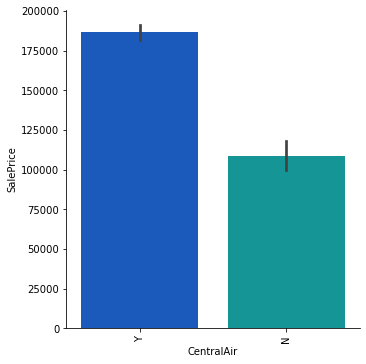

<Figure size 864x720 with 0 Axes>

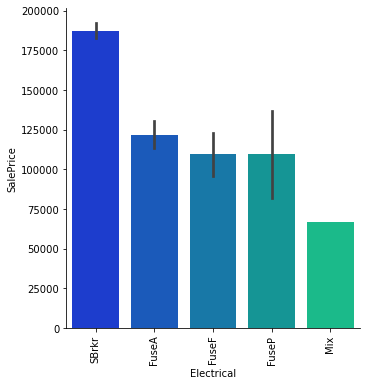

<Figure size 864x720 with 0 Axes>

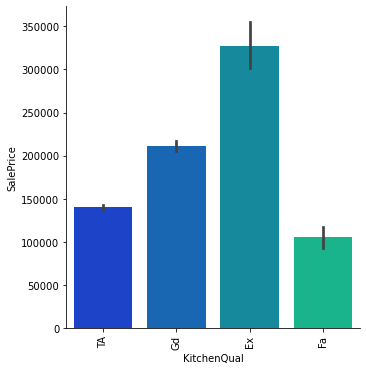

<Figure size 864x720 with 0 Axes>

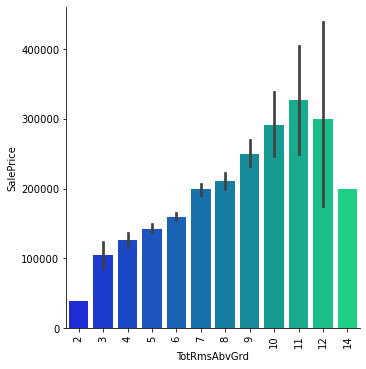

<Figure size 864x720 with 0 Axes>

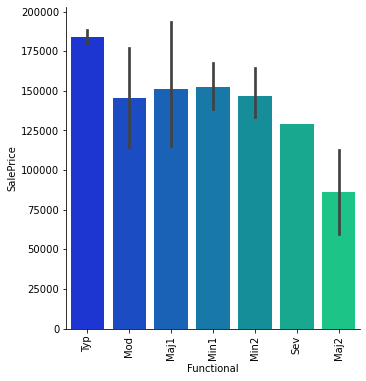

<Figure size 864x720 with 0 Axes>

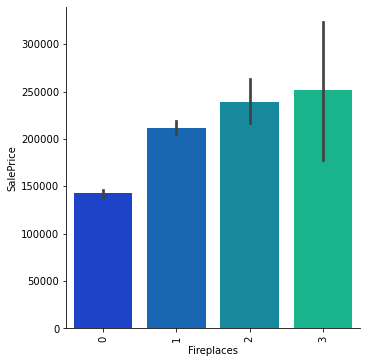

<Figure size 864x720 with 0 Axes>

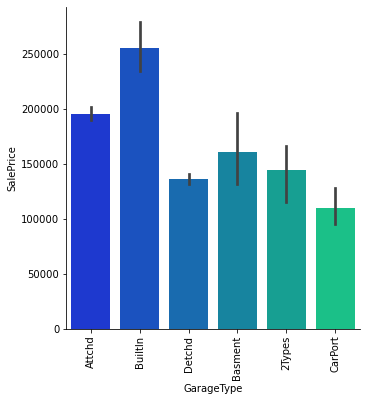

<Figure size 864x720 with 0 Axes>

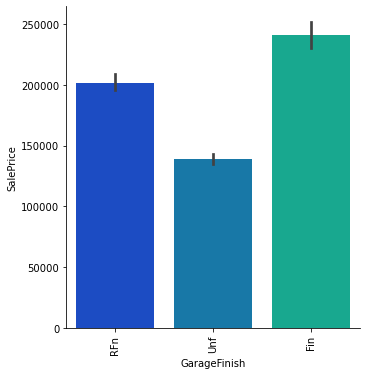

<Figure size 864x720 with 0 Axes>

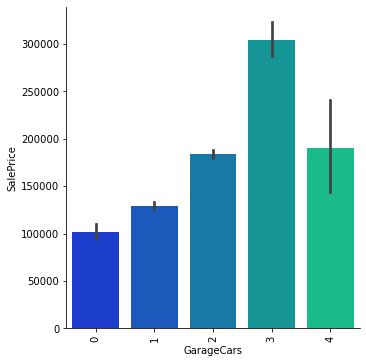

<Figure size 864x720 with 0 Axes>

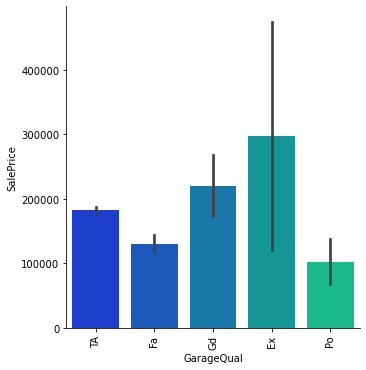

<Figure size 864x720 with 0 Axes>

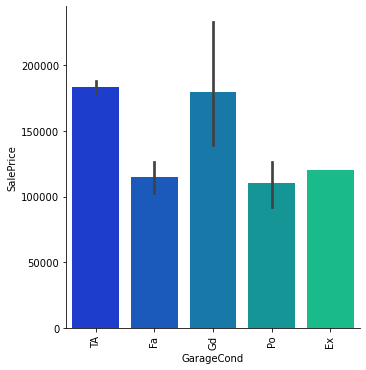

<Figure size 864x720 with 0 Axes>

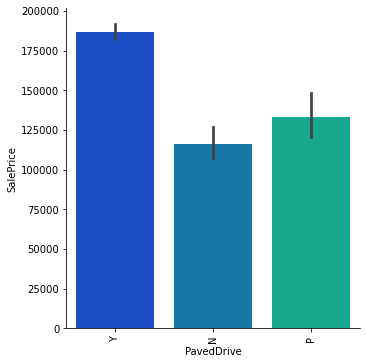

<Figure size 864x720 with 0 Axes>

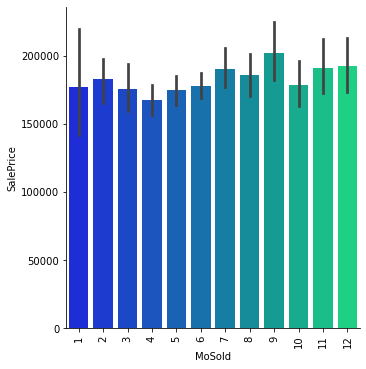

<Figure size 864x720 with 0 Axes>

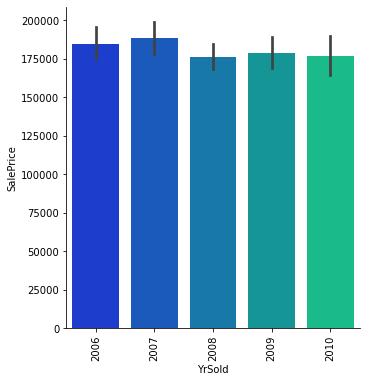

<Figure size 864x720 with 0 Axes>

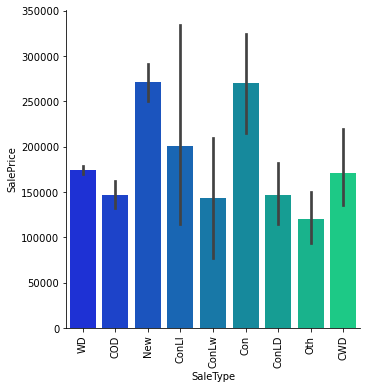

<Figure size 864x720 with 0 Axes>

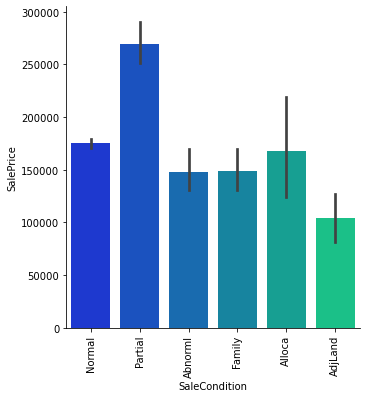

In [24]:
l=['MSSubClass', 'MSZoning', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType','GarageFinish', 'GarageCars',  'GarageQual',
       'GarageCond', 'PavedDrive',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
for i in l:
    plt.figure(figsize=(12,10))
    sns.catplot(y='SalePrice', x=i, data=df, kind="bar", palette='winter')
    plt.xticks(rotation = 90)
    plt.show()

    -Least SalePrice is for 30:1-STORY 1945 & OLDER and maximum for 60:2-
    STORY 1946 & NEWER
    -In MSZoing maximum is for category 1 i.e, Floating Village Residential
    -Lotshape 1 and 2 have almost similar price and 3 has least.
    - Landconotur corresponding to 1 i.e, HLS Hillside - Significant slope from side to 
    side has maximum price.
    - Lotconfig corresponding to 1 and 3 have similar price.
    - Neighborhoot with (15)NPkVill Northpark Villa has maximum sales price and 
    (10)IDOTRR Iowa DOT and Rail Road has least.
    - Normal condition houses have highest saleprice
    - 1Fam Single-family Detached and TwnhsI Townhouse Inside Unit have 
    maximum saleprice.
    - In HouseStyle category 3: 2Story Two story has max sale price.
    - In OverallQual: SalePrice increase as Ratings increase.
    - Similary for OverallCond 5 and 9 have max sale price
    - In RoofStyle 5:Shed has maximum.
    - In Exterior1st 6:HardBoard and 9:Other have Saleprice
    - In Exterior2nd 8:MetalSd Metal Siding
    - In MasVnrType, 3:stone has max saleprice and 0:BrkCmn Brick Common has 
    least
    - In ExterQual 0:Excellent has maximum price. Similary for ExterCond
    - In Foundation 2:PConc Poured Contrete has max price
    - In BsmtQual 0: Ex Excellent (100+ inches), In BsmtCond 1: Gd Good, In 
    BsmtExposure 1: Av Average Exposure (split levels or foyers typically score 
    average or above) have max sale prices
    - In BsmtFinType1: Rating of basement finished area - 2:GLQ Good Living 
    Quarters has max price
    - In HeatingQC: Heating quality and condition 0:Ex Excellent has max price.
    - Houses with CentralAir has higher saleprice
    - In FireplaceQu: Fireplace quality 0:Ex Excellent - Exceptional Masonry Fireplace 
    has max saleprice
    - GarageType 3:BuiltIn Built-In (Garage part of house - typically has room above 
    garage) has max saleprice
    - Finished Garage has more price
    Paved Driveway has more price
    - In 2007 maximum houses are sold followed by 2006
    - In saletype category 2 and 6 have max sale price
    - Normal sale condition has max price.


<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

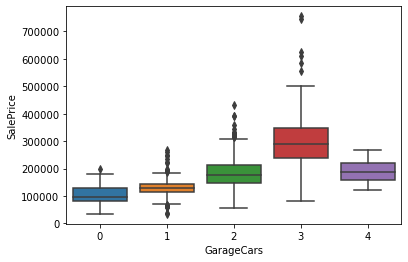

In [25]:
# Garage Area vs Sale Price
sns.boxplot(x=df['GarageCars'], y=df['SalePrice'])

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

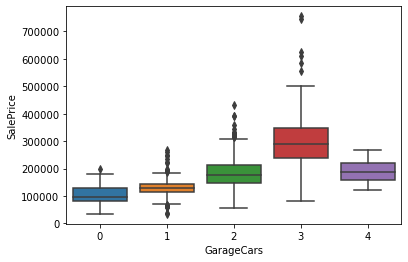

In [26]:
# GarageCars vs Sale Price
sns.boxplot(x=df['GarageCars'], y=df['SalePrice'])

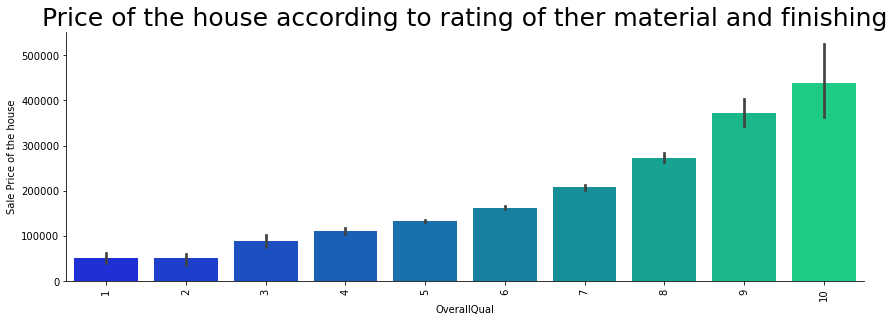

In [27]:
#Factor plot of OverallQual vs SalePrice
sns.factorplot(x="OverallQual",y="SalePrice",data=df,kind="bar",size = 4,palette = "winter",aspect=3)
plt.title('Price of the house according to rating of ther material and finishing',fontsize=25)
plt.ylabel("Sale Price of the house")
plt.xticks(rotation=90)
plt.show()

In [28]:
df_corr = df.corr().abs()
df_corr

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156     0.009921  0.033226     0.028365   
MSSubClass     0.011156    1.000000     0.356718  0.139781     0.032628   
LotFrontage    0.009921    0.356718     1.000000  0.304522     0.234812   
LotArea        0.033226    0.139781     0.304522  1.000000     0.105806   
OverallQual    0.028365    0.032628     0.234812  0.105806     1.000000   
OverallCond    0.012609    0.059316     0.053281  0.005636     0.091932   
YearBuilt      0.012713    0.027850     0.116685  0.014228     0.572323   
YearRemodAdd   0.021998    0.040581     0.083348  0.013788     0.550684   
MasVnrArea     0.051071    0.023573     0.178469  0.103321     0.407252   
BsmtFinSF1     0.005024    0.069836     0.214367  0.214103     0.239666   
BsmtFinSF2     0.005968    0.065649     0.042463  0.111170     0.059119   
BsmtUnfSF      0.007940    0.140759     0.124098  0.002618     0.308159   
TotalBsmtSF    0.015415    0.238518     0.363472  0.260833     0.537808   
1stFlrSF       0.010496    0.251758     0.413773  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.072388  0.050986     0.295493   
LowQualFinSF   0.044230    0.046474     0.037469  0.004779     0.030429   
GrLivArea      0.008273    0.074853     0.368007  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.090343  0.158155     0.111098   
BsmtHalfBath   0.020155    0.002333     0.006979  0.048046     0.040150   
FullBath       0.005587    0.131608     0.180534  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.047222  0.014259     0.273458   
BedroomAbvGr   0.037719    0.023438     0.236840  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721     0.004905  0.017784     0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.320518  0.190015     0.427452   
Fireplaces     0.019772    0.045569     0.233221  0.271364     0.396765   
GarageYrBlt    0.000122    0.081396     0.062996  0.025865     0.514231   
GarageCars     0.016570    0.040110     0.269539  0.154871     0.600671   
GarageArea     0.017634    0.098672     0.323511  0.180403     0.562022   
WoodDeckSF     0.029643    0.012579     0.075542  0.171698     0.238923   
OpenPorchSF    0.000477    0.006100     0.137014  0.084774     0.308819   
EnclosedPorch  0.002889    0.012037     0.010287  0.018340     0.113937   
3SsnPorch      0.046635    0.043825     0.061945  0.020423     0.030371   
ScreenPorch    0.001330    0.026030     0.037655  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.180819  0.077672     0.065166   
MiscVal        0.006242    0.007683     0.000255  0.038068     0.031406   
MoSold         0.021172    0.013585     0.010451  0.001205     0.070815   
YrSold         0.000712    0.021407     0.006380  0.014261     0.027347   
SalePrice      0.023897    0.060775     0.323828  0.249499     0.789185   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609   0.012713      0.021998    0.051071    0.005024   
MSSubClass        0.059316   0.027850      0.040581    0.023573    0.069836   
LotFrontage       0.053281   0.116685      0.083348    0.178469    0.214367   
LotArea           0.005636   0.014228      0.013788    0.103321    0.214103   
OverallQual       0.091932   0.572323      0.550684    0.407252    0.239666   
OverallCond       1.000000   0.375983      0.073741    0.125694    0.046231   
YearBuilt         0.375983   1.000000      0.592855    0.311600    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.176529    0.128451   
MasVnrArea        0.125694   0.311600      0.176529    1.000000    0.261256   
BsmtFinSF1        0.046231   0.249503      0.128451    0.261256    1.000000   
BsmtFinSF2        0.040229   0.049107      0.067759    0.071330    0.050117   
BsmtUnfSF         0.136841   0.149040      0.181133    0.113862    0.495251   
TotalBsmtSF       0.171098   0.391452      0.291066    0.360067    0

<AxesSubplot:>

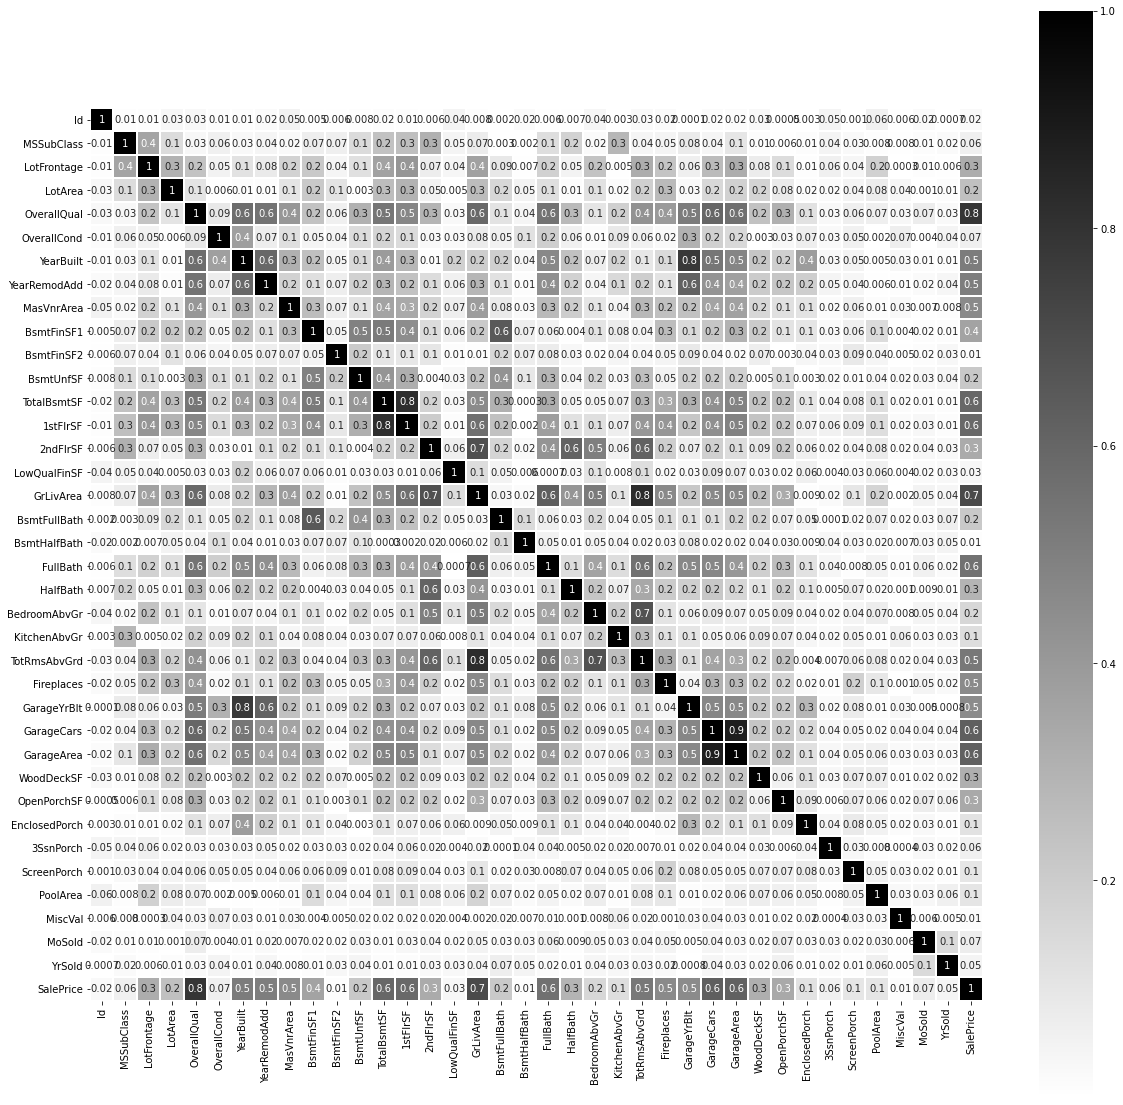

In [29]:
plt.figure(figsize = (20,20))
sns.heatmap(df_corr,annot = True, square = True,
           fmt = '.1g', linewidth = 1 ,cmap = 'binary' )

Some columns are having high correlation in-between. 

LotFrontage  

Overall Quality  

Year Built  

Year removeadd  

MasVnrArea  

TotalBsmn SF  

1st Floor SF  

GrLiving Area  

Fullbath  

Fireplaces  

Garage Area 

In [30]:
df.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.409147
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.678333
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

### Removing Outliers

In [32]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

df_new = df[~((df < (Q1 - 1.5* IQR))|(df > (Q3 + 1.5*IQR))).any(axis = 1)]

In [33]:
print('Shape Before and After')
print('Shape Before:',df.shape)
print('Shape After:',df_new.shape)
print('Percentage Loss :',(df.shape[0]-df_new.shape[0])/df.shape[0])

Shape Before and After
Shape Before: (1460, 77)
Shape After: (559, 77)
Percentage Loss : 0.6171232876712329


As we can see there are so much data loss after removing the outliers , so we will proceed further with the outlier data

In [34]:
#Encoding the categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in Categorical_df:
    df[i] = le.fit_transform(df[i])
df.head()


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  127         120         3         69.0     4928       1         0   
1  889          20         3         95.0    15865       1         0   
2  793          60         3         92.0     9920       1         0   
3  110          20         3        105.0    11751       1         0   
4  422          20         3         69.0    16635       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0            13           2   
1            3          0          4          1            12           2   
2            3          0          1          0            15           2   
3            3          0          4          0            14           2   
4            3          0          2          0            14           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         4           2            6            5       1976   
1           2         0           2            8            6       1970   
2           2         0           5            7            5       1996   
3           2         0           2            6            6       1977   
4           2         0           2            6            7       1977   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1976          1         1            9           10           2   
1          1970          0         5           13           14           2   
2          1997          1         1            8            8           2   
3          1977          3         1            9           10           1   
4          2000          1         1            5            5           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          3          4           1         2         3   
1         0.0          2          2           2         3         1   
2         0.0          2          4           2         2         3   
3       480.0          3          4           1         2         3   
4       126.0          2          4           1         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             0         120             5           0   
1             1             0         351             4         823   
2             0             2         862             5           0   
3             3             1         705             5           0   
4             3             0        1246             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        958         1078        1          4           1           4   
1       1043         2217        1          0           1           4   
2        255         1117        1          0           1           4   
3       1139         1844        1          0           1           4   
4        356         1602        1          2           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             2             1            3             5   
1         2         0             4             1            2             8   
2         2         1             3             1            3             8   
3         2         0             3             1            3             7   
4         2         

In [35]:
df_train=df.loc[df["source"]==1]
df_test=df.loc[df["source"]==0]
df_test.reset_index(drop=True,inplace=True)
df_test.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   337          20         3         86.0    14157       1         0   
1  1018         120         3         69.0     5814       1         0   
2   929          20         3         69.0    11838       1         3   
3  1148          70         3         75.0    12000       1         3   
4  1227          60         3         86.0    14598       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          0          0          0            22           2   
1            3          0          1          0            22           2   
2            3          0          4          0             5           2   
3            0          0          4          0             6           2   
4            3          0          1          0            21           1   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           2            9            5       2005   
1           2         4           2            8            5       1984   
2           2         0           2            8            5       2001   
3           2         0           5            7            7       1941   
4           2         0           5            6            5       2007   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2006          3         1           12           13           3   
1          1984          1         1            6            6           2   
2          2001          3         1           12           13           2   
3          1950          1         1            8            8           2   
4          2007          1         1           12           13           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       200.0          2          4           2         0         3   
1         0.0          2          4           1         2         3   
2         0.0          2          4           2         2         3   
3         0.0          3          4           1         3         3   
4        74.0          2          4           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             2        1249             5           0   
1             0             2        1036             5           0   
2             0             5           0             5           0   
3             3             4         275             5           0   
4             2             5           0             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        673         1922        1          0           1           4   
1        184         1220        1          2           1           4   
2       1753         1753        1          0           1           4   
3        429          704        1          0           1           4   
4        894          894        1          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0      1922         0             0       1922             1             0   
1      1360         0             0       1360             1             0   
2      1788         0             0       1788             0             0   
3       860       704             0       1564             0             0   
4       894      1039             0       1933             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             3             1            2             8   
1         1         0             1             1            2             4   
2         2         0             3             1            0             7   
3         1         1             3             1            1             7   
4         2    

In [36]:
df_train.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  127         120         3         69.0     4928       1         0   
1  889          20         3         95.0    15865       1         0   
2  793          60         3         92.0     9920       1         0   
3  110          20         3        105.0    11751       1         0   
4  422          20         3         69.0    16635       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0            13           2   
1            3          0          4          1            12           2   
2            3          0          1          0            15           2   
3            3          0          4          0            14           2   
4            3          0          2          0            14           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         4           2            6            5       1976   
1           2         0           2            8            6       1970   
2           2         0           5            7            5       1996   
3           2         0           2            6            6       1977   
4           2         0           2            6            7       1977   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1976          1         1            9           10           2   
1          1970          0         5           13           14           2   
2          1997          1         1            8            8           2   
3          1977          3         1            9           10           1   
4          2000          1         1            5            5           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          3          4           1         2         3   
1         0.0          2          2           2         3         1   
2         0.0          2          4           2         2         3   
3       480.0          3          4           1         2         3   
4       126.0          2          4           1         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             0         120             5           0   
1             1             0         351             4         823   
2             0             2         862             5           0   
3             3             1         705             5           0   
4             3             0        1246             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        958         1078        1          4           1           4   
1       1043         2217        1          0           1           4   
2        255         1117        1          0           1           4   
3       1139         1844        1          0           1           4   
4        356         1602        1          2           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             2             1            3             5   
1         2         0             4             1            2             8   
2         2         1             3             1            3             8   
3         2         0             3             1            3             7   
4         2         

In [37]:
#lets drop source column from df_train and df_test
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

In [38]:
#Lets drop the Item_Outlet_Sales from test dataset as that is the o/p variable that needs to be predicted
df_test.drop(columns=["SalePrice"],inplace=True)

In [39]:
df_test.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   337          20         3         86.0    14157       1         0   
1  1018         120         3         69.0     5814       1         0   
2   929          20         3         69.0    11838       1         3   
3  1148          70         3         75.0    12000       1         3   
4  1227          60         3         86.0    14598       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          0          0          0            22           2   
1            3          0          1          0            22           2   
2            3          0          4          0             5           2   
3            0          0          4          0             6           2   
4            3          0          1          0            21           1   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           2            9            5       2005   
1           2         4           2            8            5       1984   
2           2         0           2            8            5       2001   
3           2         0           5            7            7       1941   
4           2         0           5            6            5       2007   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2006          3         1           12           13           3   
1          1984          1         1            6            6           2   
2          2001          3         1           12           13           2   
3          1950          1         1            8            8           2   
4          2007          1         1           12           13           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       200.0          2          4           2         0         3   
1         0.0          2          4           1         2         3   
2         0.0          2          4           2         2         3   
3         0.0          3          4           1         3         3   
4        74.0          2          4           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             2        1249             5           0   
1             0             2        1036             5           0   
2             0             5           0             5           0   
3             3             4         275             5           0   
4             2             5           0             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        673         1922        1          0           1           4   
1        184         1220        1          2           1           4   
2       1753         1753        1          0           1           4   
3        429          704        1          0           1           4   
4        894          894        1          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0      1922         0             0       1922             1             0   
1      1360         0             0       1360             1             0   
2      1788         0             0       1788             0             0   
3       860       704             0       1564             0             0   
4       894      1039             0       1933             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             3             1            2             8   
1         1         0             1             1            2             4   
2         2         0             3             1            0             7   
3         1         1             3             1            1             7   
4         2    

In [40]:
#seprating input and output from df_train
x = df_train.drop('SalePrice',axis =1)
y = df_train["SalePrice"]

In [41]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 25)

## PCA

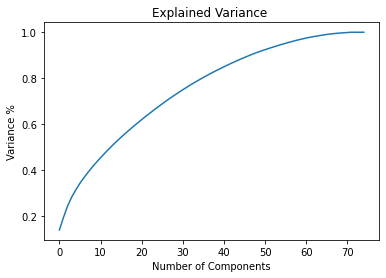

In [43]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance ')
plt.show()

Using PCA for Rededuncy of the variables

In [44]:
pca  = PCA(n_components = 40)
new_x = pca.fit_transform(x_scaled)

## Model Evaluation

In [45]:
#Finding the best random state
maxR2 = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(new_x,y,test_size = 0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    R2score = r2_score(y_test,pred)
    if R2score > maxR2:
        maxR2 = R2score
        maxRS = i
print('R2 score is',maxR2, 'on Random State',maxRS)

R2 score is 0.8722301402949886 on Random State 135


In [46]:
x_train,x_test,y_train,y_test = train_test_split(new_x,y,test_size = 0.25,random_state = maxRS)

In [47]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1,solver='cholesky')

ridge_reg.fit(x_train,y_train)
p_ridge=ridge_reg.predict(x_train)
p_ridge_test=ridge_reg.predict(x_test)
r2_score(y_test,p_ridge_test)

0.8722386984141501

In [48]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.2)

lasso_reg.fit(x_train,y_train)
p_lasso=lasso_reg.predict(x_train)
p_lasso_test=lasso_reg.predict(x_test)
r2_score(y_test,p_lasso_test)

0.8722311389658923

R2_Score of Linear regression: 0.8722301402949886
MAE: 20624.76779511629
MSE: 933536546.7952521
RMSE: 30553.830312994345


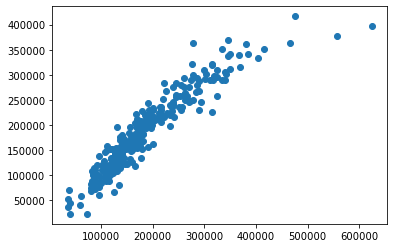

In [49]:
#Applying linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print('R2_Score of Linear regression:',r2_score(y_test,predlr))
print('MAE:', metrics.mean_absolute_error(y_test, predlr))
print('MSE:', metrics.mean_squared_error(y_test, predlr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predlr)))
plt.scatter(x=y_test,y=predlr)

R2_score of Random Forest: 0.8909750092015639
MAE: 18513.232739726027
MSE: 796579206.233285
RMSE: 28223.734803056894


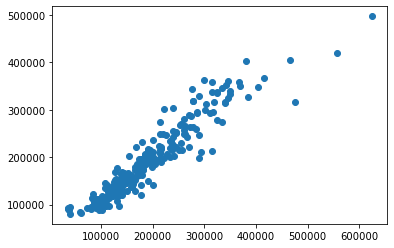

In [50]:
#Applying RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
RFR = r2_score(y_test,predrf)
print('R2_score of Random Forest:',RFR)
print('MAE:', metrics.mean_absolute_error(y_test, predrf))
print('MSE:', metrics.mean_squared_error(y_test, predrf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predrf)))
plt.scatter(x=y_test,y=predrf)

R2_score of KNN : 0.7738991448203191
MAE: 24741.791780821917
MSE: 1651981242.3619175
RMSE: 40644.57211439084


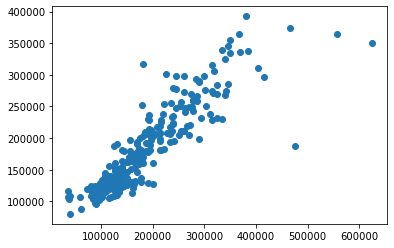

In [51]:
#Applying KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train,y_train)
predknn = KNN.predict(x_test)
KNNR = r2_score(y_test,predknn)
print('R2_score of KNN :',KNNR)
print('MAE:', metrics.mean_absolute_error(y_test, predknn))
print('MSE:', metrics.mean_squared_error(y_test, predknn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predknn)))
plt.scatter(x=y_test,y=predknn)

R2_score of GB : 0.9026404189248947
MAE: 18362.544103143187
MSE: 711347162.1877451
RMSE: 26671.09225711885


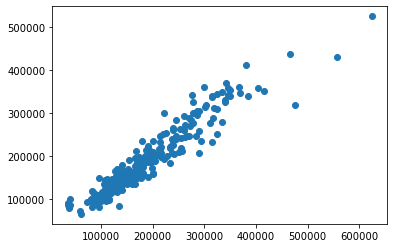

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
predgb = GB.predict(x_test)
GBR = r2_score(y_test,predgb)
print('R2_score of GB :',GBR)
print('MAE:', metrics.mean_absolute_error(y_test, predgb))
print('MSE:', metrics.mean_squared_error(y_test, predgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predgb)))
plt.scatter(x=y_test,y=predgb)


R2_score of DT: 0.7633512845196915
MAE: 28882.075342465752
MSE: 1729048033.4178083
RMSE: 41581.82335369396


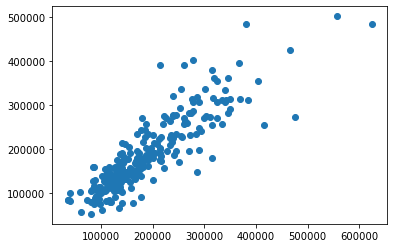

In [53]:
#Applying DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
DTR = r2_score(y_test,preddt)
print('R2_score of DT:',DTR)
print('MAE:', metrics.mean_absolute_error(y_test, preddt))
print('MSE:', metrics.mean_squared_error(y_test, preddt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preddt)))
plt.scatter(x=y_test,y=preddt)

In [54]:
#Scaling the test data 
test_scaled  = scaler.fit_transform(df_test)

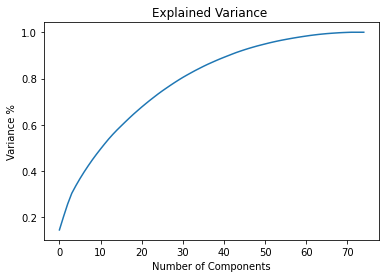

In [55]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(test_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance ')
plt.show()

In [56]:
pca  = PCA(n_components = 40)
new_test = pca.fit_transform(test_scaled)

In [59]:
#Predicting sales of the test data
price_pred = GB.predict(new_test)

In [60]:
#Make the dataframe for price_pred
price_pred=pd.DataFrame(price_pred,columns=["SalePrice"])

In [61]:
price_pred

SalePrice
0    354269.398510
1    203750.689619
2    246396.200536
3    133565.032819
4    277524.818048
5    105762.658210
6    146485.214316
7    320739.981992
8    248089.157834
9    174956.307415
10   108236.463881
11   160446.994217
12   171552.130094
13   268210.041528
14   432507.250264
15   123336.271902
16   144082.365919
17   137711.968258
18   172970.224654
19   153699.328605
20   102869.845392
21   160316.761490
22   154899.649471
23    73073.171198
24    91907.887186
25   141290.392354
26   183282.913365
27   163817.446988
28   168852.149039
29   114083.674747
30   144793.545728
31   192710.978785
32   272871.792677
33   222493.996444
34    76060.307234
35   170272.438770
36   172517.224471
37   110644.057011
38   148885.505461
39   141865.527192
40   116228.565761
41   300786.298620
42   194600.768753
43   213619.698419
44   144302.436106
45   121083.347003
46   148126.598408
47    80819.912861
48   206767.163199
49   373014.314314
50   137741.212570
51   280025.586943
52   115881.859224
53   119114.562590
54   284648.260132
55   127755.216647
56   135096.735612
57   194274.855778
58   145953.259375
59   287624.675317
60    97922.916024
61   172186.105272
62   151188.139467
63   147972.557291
64   187635.864257
65   102309.432254
66   165867.421804
67   194688.175332
68   160674.370967
69   166812.315209
70   307854.529560
71   216261.777090
72   133311.738574
73   162787.283432
74   148019.493511
75   220441.133443
76   339973.327584
77   171680.640506
78   314163.348570
79   176671.881147
80   206433.678686
81   155637.694516
82   168919.282000
83   156720.735243
84   184554.758413
85   240445.367922
86   100931.944556
87   356758.672555
88   152331.862812
89   186859.178766
90   255352.973047
91   129577.837809
92   119614.728770
93   125454.662722
94   193295.304314
95   157738.049432
96   259459.506387
97   180661.538458
98   326165.579235
99   141097.014065
100  226156.242607
101  112380.471749
102  129310.628487
103  170759.631683
104  189182.339403
105  124664.289312
106  220804.473903
107  175478.288886
108  205142.727497
109  187128.488127
110  200720.712577
111  174881.224908
112  132580.587713
113  280512.537735
114  116466.527830
115  100325.355621
116  124609.965882
117  196358.350186
118  150853.107474
119  114704.096890
120  104542.686466
121  178571.256564
122  268368.557352
123  126425.096864
124  141739.019624
125  176597.278902
126  118201.798044
127  212091.821887
128  109630.507127
129   90277.146151
130  164234.001741
131  216720.864849
132  137486.870103
133  160694.481379
134  149399.582416
135  352469.403803
136  210659.025075
137  120963.191962
138  316710.845245
139  125379.929580
140  126525.541439
141  505872.962896
142   85345.611952
143  399901.105724
144  196927.001239
145  227792.083432
146  113916.818200
147  145982.744004
148  111327.126962
149  183338.994755
150  161917.630703
151  146589.053030
152  198614.083583
153  132833.795370
154   98752.774191
155  163214.195670
156  207024.398307
157  182694.248232
158  133289.880027
159  167884.685776
160  199813.328692
161  151429.674534
162  192445.138977
163  142145.212434
164  110126.797072
165  326922.330196
166  189012.331549
167  191635.070872
168  144980.186243
169  205351.780993
170  176046.621164
171  144149.850753
172  147715.766475
173  223643.453543
174  168699.473775
175  402166.462039
176  105733.981175
177  116193.744512
178  122646.220365
179  170935.948045
180  193369.519273
181  196405.684796
182  285121.072014
183  170013.339724
184  491017.362113
185  344619.295660
186  167867.565438
187   91096.334085
188  167890.651894
189  146718.304315
190   97965.445228
191  225707.905193
192  211709.434435
193  109714.220959
194  112138.967205
195  119313.953984
196  189117.886688
197  205522.840454
198  102938.866250
199  200705.050536
200  161034.497727
201  104841.315269
202  278143.282891
203  279895.693746
204  143603.090850
205  130584.530155
206  289013.360479
207  159816.126832
208  134871.258157
209  153910.869291


In [67]:
SalePrice =round(price_pred)

In [69]:
df_test['SalePrice'] = SalePrice
df_test.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   337          20         3         86.0    14157       1         0   
1  1018         120         3         69.0     5814       1         0   
2   929          20         3         69.0    11838       1         3   
3  1148          70         3         75.0    12000       1         3   
4  1227          60         3         86.0    14598       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          0          0          0            22           2   
1            3          0          1          0            22           2   
2            3          0          4          0             5           2   
3            0          0          4          0             6           2   
4            3          0          1          0            21           1   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           2            9            5       2005   
1           2         4           2            8            5       1984   
2           2         0           2            8            5       2001   
3           2         0           5            7            7       1941   
4           2         0           5            6            5       2007   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2006          3         1           12           13           3   
1          1984          1         1            6            6           2   
2          2001          3         1           12           13           2   
3          1950          1         1            8            8           2   
4          2007          1         1           12           13           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       200.0          2          4           2         0         3   
1         0.0          2          4           1         2         3   
2         0.0          2          4           2         2         3   
3         0.0          3          4           1         3         3   
4        74.0          2          4           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             2        1249             5           0   
1             0             2        1036             5           0   
2             0             5           0             5           0   
3             3             4         275             5           0   
4             2             5           0             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        673         1922        1          0           1           4   
1        184         1220        1          2           1           4   
2       1753         1753        1          0           1           4   
3        429          704        1          0           1           4   
4        894          894        1          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0      1922         0             0       1922             1             0   
1      1360         0             0       1360             1             0   
2      1788         0             0       1788             0             0   
3       860       704             0       1564             0             0   
4       894      1039             0       1933             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             3             1            2             8   
1         1         0             1             1            2             4   
2         2         0             3             1            0             7   
3         1         1             3             1            1             7   
4         2    

## Saving The Model

In [63]:
import joblib
joblib.dump(GB,'House_price_prediction.pkl')

['House_price_prediction.pkl']

As we get Best R2 Score from Gradient Boost Regressor so we will save the GB model for future use